> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-show Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Make sure that visualizations are plotted inline with the notebook
from datetime import datetime, timedelta
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. 
df = pd.read_csv('no_shows.csv')
df.head()


# Perform operations to inspect data
# types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### There are not any null values in any of the columns.

In [5]:
#check for duplicate appointment ids

#it would not make sense if two appointments were given the same id, because the appointment id
#is meant to distinguish each appointment from every other appointment
#if there are two appointments with the same id, this means that the data was entered incorrectly

df['AppointmentID'].duplicated().sum()



0

#### There are not any duplicated appointment ids.

In [6]:
#make sure that none of the binary columns (Scholarship, SMS_received, etc.) have 0 for every row
#if any of these columns has 0 for every row, the column should be deleted from the dataframe
#because the variable in question is not relevant to our analysis

#create a list for all columns with binary entries
binary_col_ls = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

#iterate through each binary column to determine the amount of 1 (True) entries in each column

for column in binary_col_ls:
    print(column, (df[column] == 1).sum())
    
#compare this to the number of total entries in each column (total rows in the dataframe)    
print("\n", df.shape[0])



Scholarship 10861
Hipertension 21801
Diabetes 7943
Alcoholism 3360
Handcap 2042
SMS_received 35482

 110527


#### For each binary column, the amount of True (1) entries is greater than zero and less than 110,527.
#### This means that we should retain all of these columns.

In [7]:
#check the data type of the PatientId column by printing the first entry
#patiend id should be an integer
df['PatientId'][0]

29872499824296.0

#### The values in the 'PatientId' column are floats. We will need to change them to integers.

In [8]:
#check the data type of the age column by printing the first entry
#age should be an integer, so that it can be used in computations
df["Age"][0]


62

#### The values in the "Age" column are integers, so there is no need to change the data type.

In [9]:
#check the data type of the ScheduledDay column by printing the first entry
#ScheduledDay should be a datetime
df["ScheduledDay"][0]

'2016-04-29T18:38:08Z'

In [10]:
#check the data type of the AppointmentDay column
#AppointmentDay should also be a datetime
df["AppointmentDay"][0]

'2016-04-29T00:00:00Z'

#### The columns for ScheduledDay and AppointmentDay contain strings instead of datetimes. We will need to fix this.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
#convert the floats in the 'PatientId' column to integers
df['PatientId'] = df['PatientId'].astype(int)

#verify that the floats have been converted to integers
df['PatientId'].head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64

#### The "PatientId" column has been successfully converted into integers.

In [13]:
#convert the strings in the ScheduledDay column to datetimes
df["ScheduledDay"] = df["ScheduledDay"].apply(pd.to_datetime)

#verify that the strings have been converted to datetimes
df["ScheduledDay"].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

#### The ScheduledDay column has been successfully converted into datetimes.

In [14]:
#Convert the strings in the AppointmentDay column to datetimes
df["AppointmentDay"] = df["AppointmentDay"].apply(pd.to_datetime)

#Verify that the strings have been converted to datetimes
df["AppointmentDay"].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

#### AppointmentDay column has been successfully converted into datetimes.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

#### Is there a relationship between no-show status and the amount of time that elapsed between the date on which the appointment was booked and the date on which the appointment was supposed to occur?

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [16]:
#create a new column called days_after_scheduling
#that contains the difference (in days) between AppointmentDay and ScheduledDay

df['days_after_scheduling'] = df['AppointmentDay'] - df['ScheduledDay']

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_after_scheduling
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


#### The new column has been successfully created, but we need to clean up the entries so that only the number of days is displayed.

In [17]:
#create a function that takes a timedelta as its argument and returns the number of days as an integer
def num_days(delta):
    return delta.days

#apply this function to each entry in days_after_scheduling
df['days_after_scheduling'] = df['days_after_scheduling'].apply(num_days)

df['days_after_scheduling']

0         -1
1         -1
2         -1
3         -1
4         -1
5          1
6          1
7          1
8         -1
9          1
10         1
11         2
12         0
13         0
14         0
15         2
16         0
17         0
18         2
19        -1
20         1
21         1
22         3
23         0
24        -1
25         2
26        -1
27         1
28        -1
29        -1
          ..
110497    -1
110498    -1
110499    -1
110500    -1
110501    -1
110502    -1
110503    -1
110504    -1
110505    -1
110506    -1
110507    -1
110508    -1
110509    -1
110510    -1
110511    -1
110512    -1
110513    -1
110514    -1
110515     1
110516     0
110517    -1
110518    40
110519    40
110520    34
110521    34
110522    34
110523    34
110524    40
110525    40
110526    40
Name: days_after_scheduling, Length: 110527, dtype: int64

#### There are some negative values in the column. These values cannot possibly be accurate, because an appointment cannot occur before it is scheduled.

#### Therefore, we should covert these value to zero.

In [18]:
#create a function that converts negative one to zero
def neg_to_zero(value):
    if value == -1:
        return 0
    else:
        return value

#apply this function to each entry of days_after_scheduling
df['days_after_scheduling'].apply(neg_to_zero)

0          0
1          0
2          0
3          0
4          0
5          1
6          1
7          1
8          0
9          1
10         1
11         2
12         0
13         0
14         0
15         2
16         0
17         0
18         2
19         0
20         1
21         1
22         3
23         0
24         0
25         2
26         0
27         1
28         0
29         0
          ..
110497     0
110498     0
110499     0
110500     0
110501     0
110502     0
110503     0
110504     0
110505     0
110506     0
110507     0
110508     0
110509     0
110510     0
110511     0
110512     0
110513     0
110514     0
110515     1
110516     0
110517     0
110518    40
110519    40
110520    34
110521    34
110522    34
110523    34
110524    40
110525    40
110526    40
Name: days_after_scheduling, Length: 110527, dtype: int64

#### Now that all of the values in days_after_scheduling are in the proper format, we can explore how this data relates to no-show status.

In [19]:
#create a list of x-values that contains each unique value in the days_after_scheduling column
x_values = list(set(df['days_after_scheduling'].values))

#print the list to verify that it looks reasonable
print(x_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178, -2, -7, -1]


In [20]:
#create a list of y-values that contains the PROPORTION of no-shows
# for each unique value in the days_after_scheduling column

y_values = []

#for each x-value, create a list of corresponding no-show values

for x_value in x_values:
    no_shows_list = df["No-show"][df['days_after_scheduling'] == x_value].values
    
    #assign the amount of no-shows ('Yes' values) to a variable
    #assign the amount of shows ('No' values) to a variable
    #iterate through each no-show list to determine
    #the proportion of no-show ("Yes") values for each x-value
    #compute the ratio and append it to the list of y-values
    no_show_count = 0
    show_count = 0
    for element in no_shows_list:
        if element == 'Yes':
            no_show_count += 1
        else:
            show_count += 1
    
    #add a very small value to show_count to prevent division by 0
    y_values.append(no_show_count / (show_count + .000001))

#print the list to verify that it looks reasonable    
print(y_values)

#np.median(y_values)

[0.2714634145679357, 0.31270739794793917, 0.3076923075452975, 0.30327666905561057, 0.3625779624272025, 0.32971014481893607, 0.3639143729875134, 0.4031287602869261, 0.37768240310928547, 0.4626708722790001, 0.4622222215374486, 0.46325459256790735, 0.46771378667738756, 0.45649999977175, 0.501498500997504, 0.4387499994515625, 0.46235138644339313, 0.44005641686874974, 0.5330396467943618, 0.5237483947063564, 0.44712286123862915, 0.5253576065990149, 0.5054945045686914, 0.60723514054978, 0.6719160087351286, 0.5619658107650303, 0.46176046109414076, 0.41812136291095475, 0.48567530629512234, 0.3617021269599572, 0.48672566263998746, 0.5421052617313019, 0.5022624423025737, 0.5018587351266566, 0.5943708599430946, 0.4499999988157895, 0.5613207520692417, 0.5190839655031758, 0.47826086540642726, 0.6821192007806676, 0.5475113097397678, 0.5855513285720482, 0.4269662897361444, 0.4272727233884298, 0.5747126370722686, 0.5714285640074213, 0.43421052060249316, 0.40963854928146326, 0.5319148898445752, 0.368421

#### Most of the values in this list are smaller than 1, but several of them are greater than 10,000.

#### We should eliminate these outliers so that we can obtain insights from our visualization.

#### In order to do this, we will need to use np.percentile()

https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

In [21]:
#remove any outliers (any y-values greater than Q3 + 1.5 * IQR)
#the third quartile is the same as the 75th percentile
#the first quartile is the same as the 50th percentile

q3 = np.percentile(y_values, 75)
q1 = np.percentile(y_values, 25)
iqr = q3 - q1

#create a variable for the point at which outliers will be removed
outlier_cutoff = q3 + (1.5 * iqr)


outlier_cutoff

0.97582074840405175

In [22]:
#create new lists for x and y values with all outliers removed
new_y = []
new_x = []

#for each y-value, check whether the value exceeds the outlier cutoff
#if it does not, append the value to the new list of y-values
#append the corresponding x-value to the new list of x-values 
for index, value in enumerate(y_values):
    if value <= outlier_cutoff:
        new_y.append(value)
        new_x.append(x_values[index])

#verify that the new list of y-values does not contain any outliers         
print(max(new_y) < outlier_cutoff)

#verify that there are an equal amount of x and y values
print(len(new_y) == len(new_x))

True
True


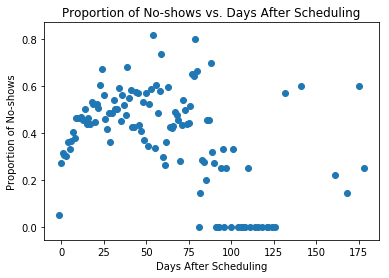

In [74]:
#plot a scatterplot to visualize the relationship between
#days after scheduling and proportion of no-shows
plt.title("Proportion of No-shows vs. Days After Scheduling")
plt.xlabel("Days After Scheduling")
plt.ylabel("Proportion of No-shows")
plt.scatter(new_x, new_y)
plt.show()

#### The scatter plot seems to suggest a negative correlation between Proportion of No-shows and Days After Scheduling. In the next cell, we will compute the correlation coefficient:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html

In [77]:
#calculate the corellation coefficient
np.corrcoef(new_x, new_y)[1,0]

-0.42574402230557357

#### The correlation coefficient is approximately equal to -0.43. This means that there is a weak-to-moderate negative relationship between No-shows and Days After Scheduling. 

### Research Question 2  (Replace this header name!)

#### Is no-show status more or less common among patients who are enrolled in the Bolsa Familia scholarship program?

In [62]:
#determine the total amount of no-shows and assign it to a variable
is_no_show = df["No-show"] == 'Yes'
ns_total = is_no_show.sum()


#determine the amount of no-shows who are enrolled in the program
is_enrolled = df["Scholarship"] == 1
enrolled_and_no_show = (is_no_show & is_enrolled) == True
ns_enrolled = len(df.loc[enrolled_and_no_show, "Scholarship"])

#determine the amount of no-shows who are not enrolled in the program
#subtract the number of enrolled no-shows from total no-shows
ns_not_enrolled = ns_total - ns_enrolled

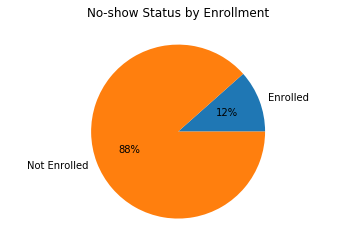

In [70]:
#create a pie chart that displays the proportion of no-shows
#from Bolsa Familia members and non-members
values = [ns_enrolled, ns_not_enrolled]
ns_labels = ['Enrolled', 'Not Enrolled']

#plot the pie chart
plt.title("No-show Status by Enrollment")
plt.axis('equal')
plt.pie(values, labels=ns_labels, autopct='%0.0f%%')
plt.show()

#### Among all of the patients in this population who failed to show up to their appointments, only 12% were enrolled in the Bolsa Familia scholarship program.

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])